<a href="https://colab.research.google.com/github/Gizem-kaya/Image-Processing-with-Python/blob/master/Advanced_Operations_Detecting_Faces_Features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Advanced Operations, Detecting Faces and Features**

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from skimage.feature import canny
from skimage import color
from skimage.feature import corner_harris, corner_peaks

In [2]:
def show_comparison(original, title, filtered, new_title):
  fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (16,12), sharex = True, sharey = True )

  ax1.imshow(original, cmap = plt.cm.gray)
  ax1.set_title(title)
  ax1.axis('off')

  ax2.imshow(filtered, cmap = plt.cm.gray)
  ax2.set_title(new_title)
  ax2.axis('off')

  plt.show()

In [3]:
def show_corners(image, coordinates, title):
  plt.figure(figsize=(8,6))
  plt.imshow(image, interpolation = 'nearest', cmap = 'gray')
  plt.title(title)
  plt.plot(coordinates[:, 1], coordinates[:, 0], '+r', markersize = 15)
  plt.axis('off')
  plt.show()

## **Finding the edges with Canny**

In [4]:
fruits = plt.imread("edge_detection.jpg")

gray_fruits = color.rgb2gray(fruits)

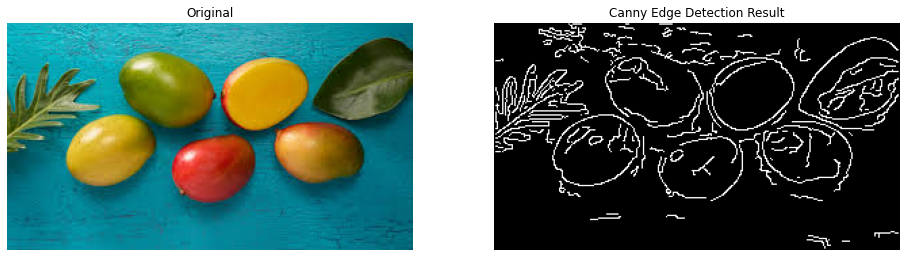

In [5]:
edges = canny(gray_fruits, sigma = 1.0)  # Second parameter is the gaussian filter(is already 1 as default). 
 
show_comparison(fruits, "Original", edges, "Canny Edge Detection Result")

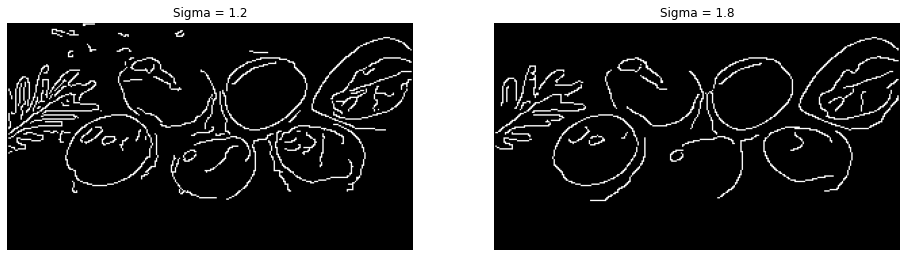

In [6]:
edges_18 = canny(gray_fruits, sigma = 1.8)  
edges_12 = canny(gray_fruits, sigma = 1.2)  

show_comparison(edges_12, "Sigma = 1.2", edges_18, "Sigma = 1.8")

## **Right around the corner**

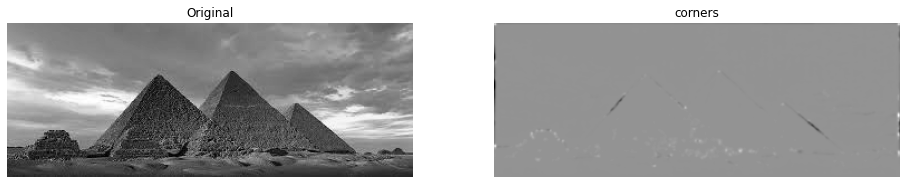

In [7]:
building = plt.imread('building.jpg')
building = color.rgb2gray(building)

measures = corner_harris(building)

show_comparison(building,'Original', measures, 'corners')

With a min_distance set to 2, we detect a total 35 corners in the image.


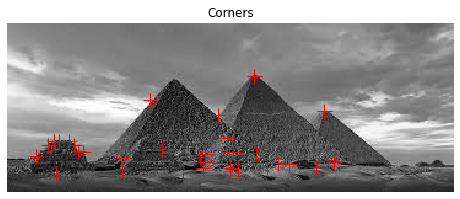

In [8]:
corner_coordinates = corner_peaks(measures, min_distance = 2)

print("With a min_distance set to 2, we detect a total", len(corner_coordinates), "corners in the image.")

show_corners(building, corner_coordinates, 'Corners')

## **Face detection**

## **Real-world applications**